In [17]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [18]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

# Load data into tf.dataset

In [19]:
#

dataset= tf.keras.preprocessing.image_dataset_from_directory(
    
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [21]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [22]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

#3 in output is rgb value
#012 denote classes early_blight,late_blight,healthy


(32, 256, 256, 3)
[1 0 0 0 0 2 2 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0]


In [23]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])
    
#printing 1st image in tensor

tf.Tensor(
[[[129. 120. 123.]
  [134. 125. 128.]
  [139. 130. 133.]
  ...
  [153. 147. 149.]
  [156. 150. 152.]
  [159. 153. 155.]]

 [[136. 127. 130.]
  [138. 129. 132.]
  [139. 130. 133.]
  ...
  [152. 146. 148.]
  [154. 148. 150.]
  [157. 151. 153.]]

 [[140. 131. 134.]
  [139. 130. 133.]
  [137. 128. 131.]
  ...
  [151. 145. 147.]
  [152. 146. 148.]
  [154. 148. 150.]]

 ...

 [[125. 113. 117.]
  [149. 137. 141.]
  [146. 134. 138.]
  ...
  [123. 114. 117.]
  [158. 149. 152.]
  [117. 108. 111.]]

 [[ 97.  85.  89.]
  [123. 111. 115.]
  [147. 135. 139.]
  ...
  [120. 111. 114.]
  [154. 145. 148.]
  [172. 163. 166.]]

 [[126. 114. 118.]
  [134. 122. 126.]
  [147. 135. 139.]
  ...
  [134. 125. 128.]
  [117. 108. 111.]
  [134. 125. 128.]]], shape=(256, 256, 3), dtype=float32)


In [24]:
#to convert tensor to numpy array we use numpy()
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    #each image is a 3d array of size=256*256 with rgb values from 0 to 255

[[[183. 171. 175.]
  [157. 145. 149.]
  [174. 162. 166.]
  ...
  [217. 209. 207.]
  [217. 209. 207.]
  [217. 209. 207.]]

 [[169. 157. 161.]
  [168. 156. 160.]
  [202. 190. 194.]
  ...
  [217. 209. 207.]
  [217. 209. 207.]
  [217. 209. 207.]]

 [[143. 131. 135.]
  [180. 168. 172.]
  [204. 192. 196.]
  ...
  [217. 209. 207.]
  [217. 209. 207.]
  [217. 209. 207.]]

 ...

 [[132. 122. 130.]
  [142. 132. 140.]
  [162. 152. 160.]
  ...
  [176. 171. 178.]
  [177. 172. 179.]
  [177. 172. 179.]]

 [[167. 157. 165.]
  [144. 134. 142.]
  [115. 105. 113.]
  ...
  [176. 171. 178.]
  [177. 172. 179.]
  [177. 172. 179.]]

 [[130. 120. 128.]
  [119. 109. 117.]
  [131. 121. 129.]
  ...
  [177. 172. 179.]
  [177. 172. 179.]
  [177. 172. 179.]]]


# Data Visualization  

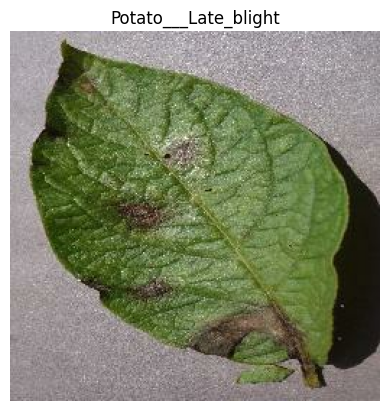

In [25]:
#visualizing particular image using imshow, it contains 3d array
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")


<Figure size 1000x1000 with 0 Axes>

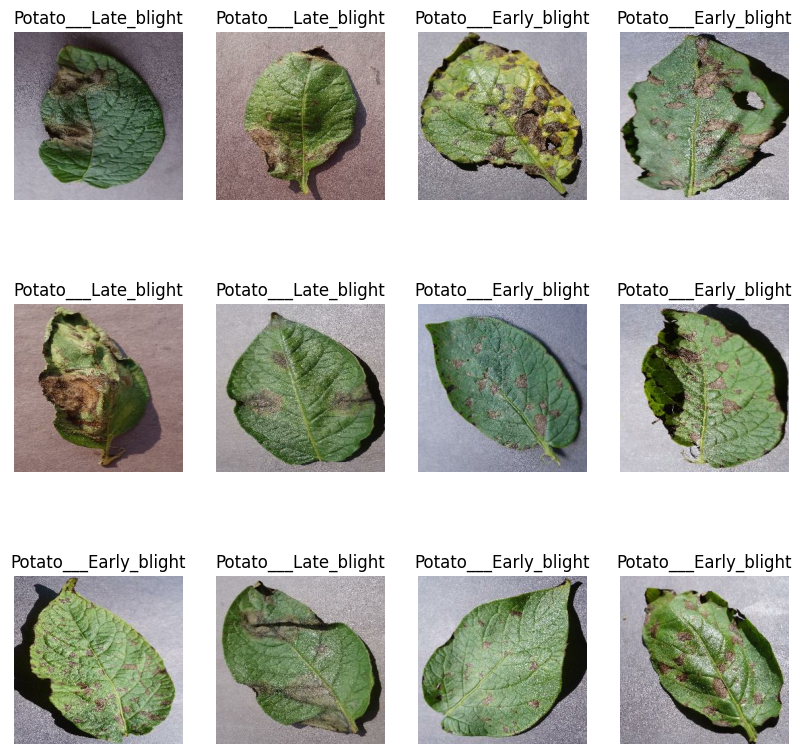

In [26]:
#to display first 12 images of batch size 32

import matplotlib.pyplot as plt

# Assuming dataset and class_names are properly defined

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    fig, axes = plt.subplots(3, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(image_batch[i].numpy().astype("uint8"))
        ax.set_title(class_names[labels_batch[i]])
        ax.axis("off")

plt.show()

# Function to split dataset

In [27]:
#Dataset should be bifurcated into 3 subsets, namely:

#Training: Dataset to be used while training
#Validation: Dataset to be tested against while training
#Test: Dataset to be tested against after we trained a model

#80%-used for training
#20%-10% for validation and 10% for testing
#after the end of each epoch validation is done
#after whole model is trained test data will be used to measure accuracy of our model
len(dataset)



68

In [28]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [29]:
#80% of length of dataset is to be used for training therefore it is 54
train_ds = dataset.take(54)
len(train_ds)

54

In [30]:
# to get remaining after 54 is used for testing we use skip method
test_ds = dataset.skip(54)
len(test_ds)

14

In [31]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [32]:
#10% of len(dataset)to be used for validation.
val_ds = test_ds.take(6)
len(val_ds)

6

In [33]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [34]:
#writing the previous code in form of a function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [35]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [36]:
len(train_ds)

54

In [37]:
len(val_ds)

6

In [38]:
len(test_ds)

8

# Catch shuffle and prefetch dataset

In [39]:
#cache- will read the image from the disk and it will keep that image in memory for the next iteration to provide better performance.


#PREFECTCH -If gpu is busy training, prefetch will load next set of batch from the disk to CPU and it will provide better performance.
#reading of batches in cpu and training of batches in gpu happen parallely .
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)





#Building the model

#Creating a layer for resizing and normalization

In [40]:
#Before we feed our images to network, we should be resizing it to the desired size.
#Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
#This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

#You might be thinking why do we need to resize (256,256) image to again (256,256). 
#You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. 
#At that time somone can supply an image that is not (256,256) and this layer will resize it.
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

#Data Augmentation

In [41]:
#Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.
#Its done by applying transformations such as horizontal flip,vertical flip,by rotation , by zooming,etc. and generating new training samples

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

#Applying Data Augmentation to Train Dataset

In [42]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

#Model Architecture

In [43]:
#We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

#Compiling the Model

In [45]:
#We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

model.compile(
     optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [46]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 52s 901ms/step - loss: 0.9146 - accuracy: 0.4826 - val_loss: 0.9005 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 49s 911ms/step - loss: 0.7924 - accuracy: 0.6250 - val_loss: 0.5892 - val_accuracy: 0.7552
Epoch 3/50
54/54 [==============================] - 50s 926ms/step - loss: 0.5060 - accuracy: 0.7656 - val_loss: 0.3383 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 51s 941ms/step - loss: 0.2979 - accuracy: 0.8848 - val_loss: 0.2910 - val_accuracy: 0.9062
Epoch 5/50
54/54 [==============================] - 49s 908ms/step - loss: 0.2299 - accuracy: 0.9039 - val_loss: 0.2826 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 49s 898ms/step - loss: 0.2037 - accuracy: 0.9288 - val_loss: 0.1475 - val_accuracy: 0.9635
Epoch 7/50
54/54 [==============================] - 49s 900ms/step - loss: 0.1731 - accuracy: 0.9334 - val_loss: 0.1757 - val_accuracy: 0.9531

In [47]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 217ms/step - loss: 0.1844 - accuracy: 0.9570


In [48]:
#Scores is  a list containing loss and accuracy value
scores

[0.18444006145000458, 0.95703125]

#Plotting the Accuracy and Loss Curves

In [49]:
history

In [50]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [51]:
#loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
type(history.history['loss'])

list

In [53]:
len(history.history['loss'])

50

In [54]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9146004915237427,
 0.792446494102478,
 0.505985677242279,
 0.29792386293411255,
 0.2298961579799652]

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

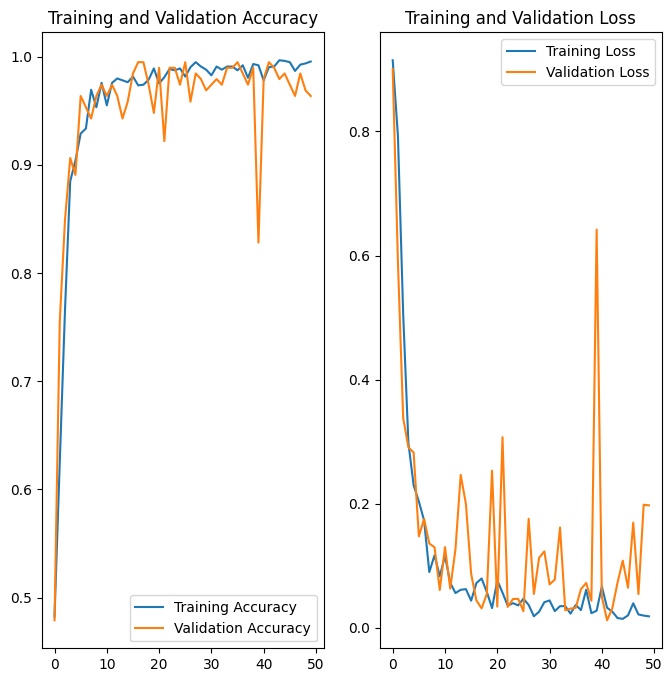

In [56]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Run prediction on a sample image

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 317ms/step
predicted label: Potato___Early_blight


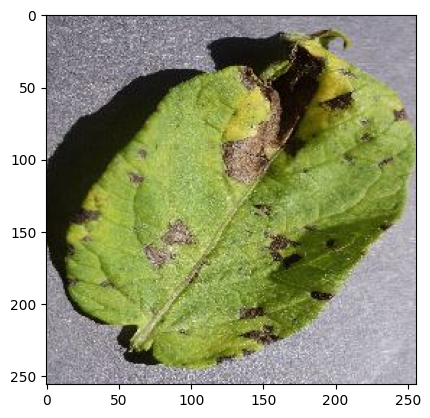

In [57]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

#Write a function for inference/prediction

In [59]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [60]:
#Now run inference on few sample images

1/1 [==============================] - 0s 25ms/step


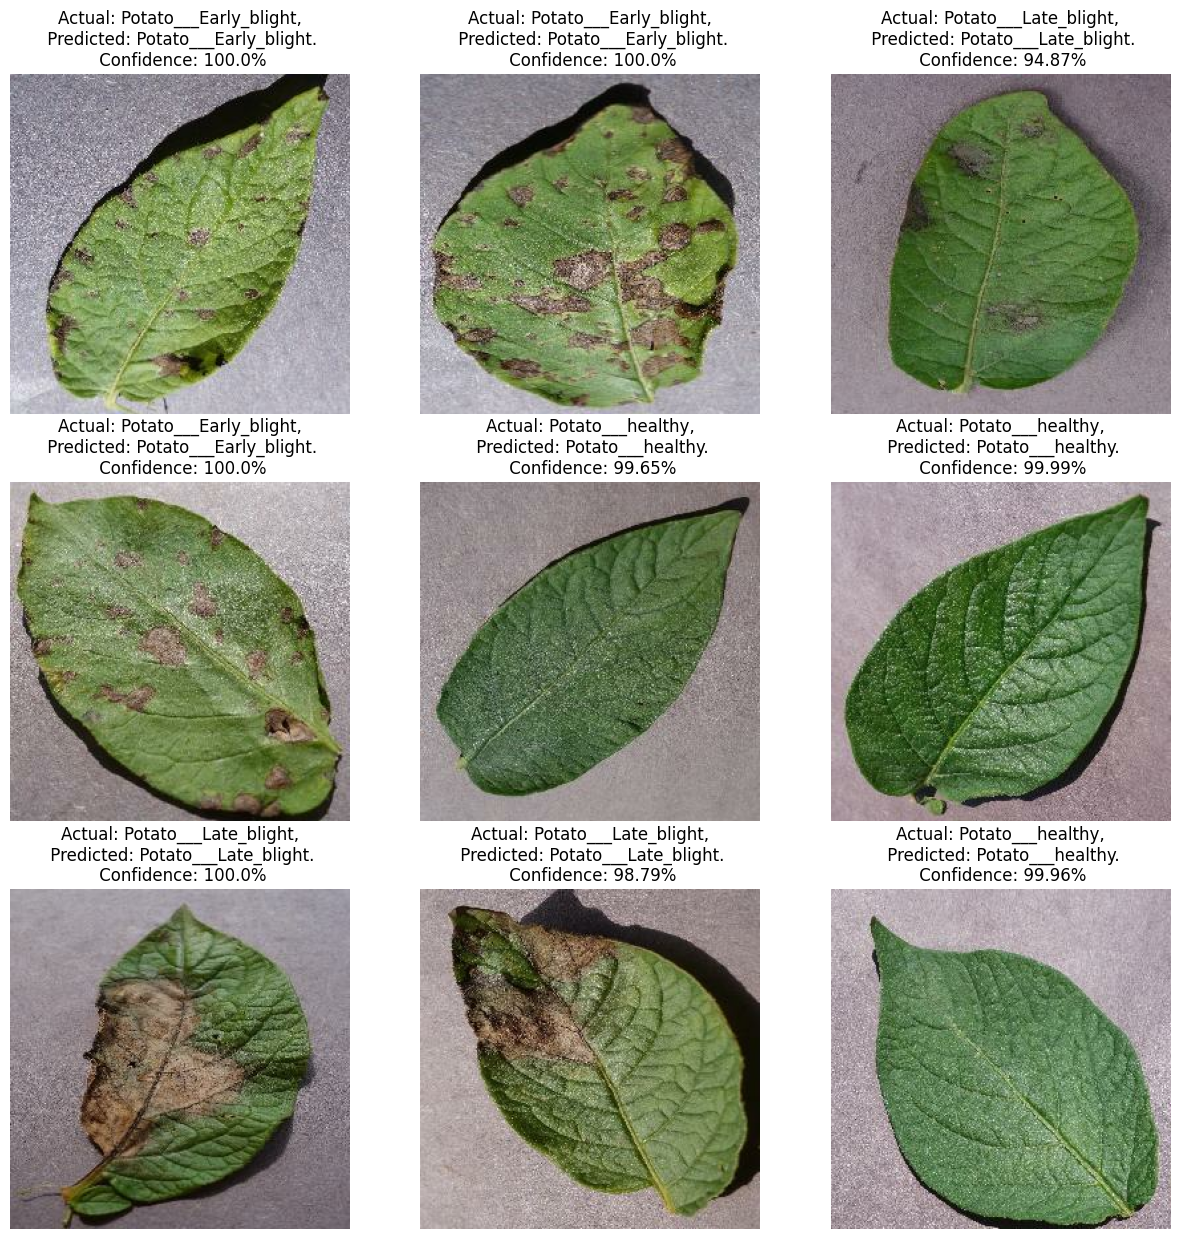

In [61]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

#Saving the Modelaxis("off")

In [65]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/3\assets


INFO:tensorflow:Assets written to: ../models/3\assets


In [66]:
model.save("../potatoes.h5")

C:\Users\91953\AppData\Roaming\Python\Python38\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
